## Exploratory Data Ananalysis
This is an analysis on a structured data on the work, life and death of over a million.The dataset was provided by Annamoradnejad Issa and can be found on Kaggle.

In [1]:
# importation of important libraries

import numpy as np
import pandas as pd
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [2]:
df = pd.read_csv('AgeDataset-V1.csv')

In [3]:
# Getting a view of how how data look like
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [4]:
df.shape

(1223009, 10)

In [5]:
# getting basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


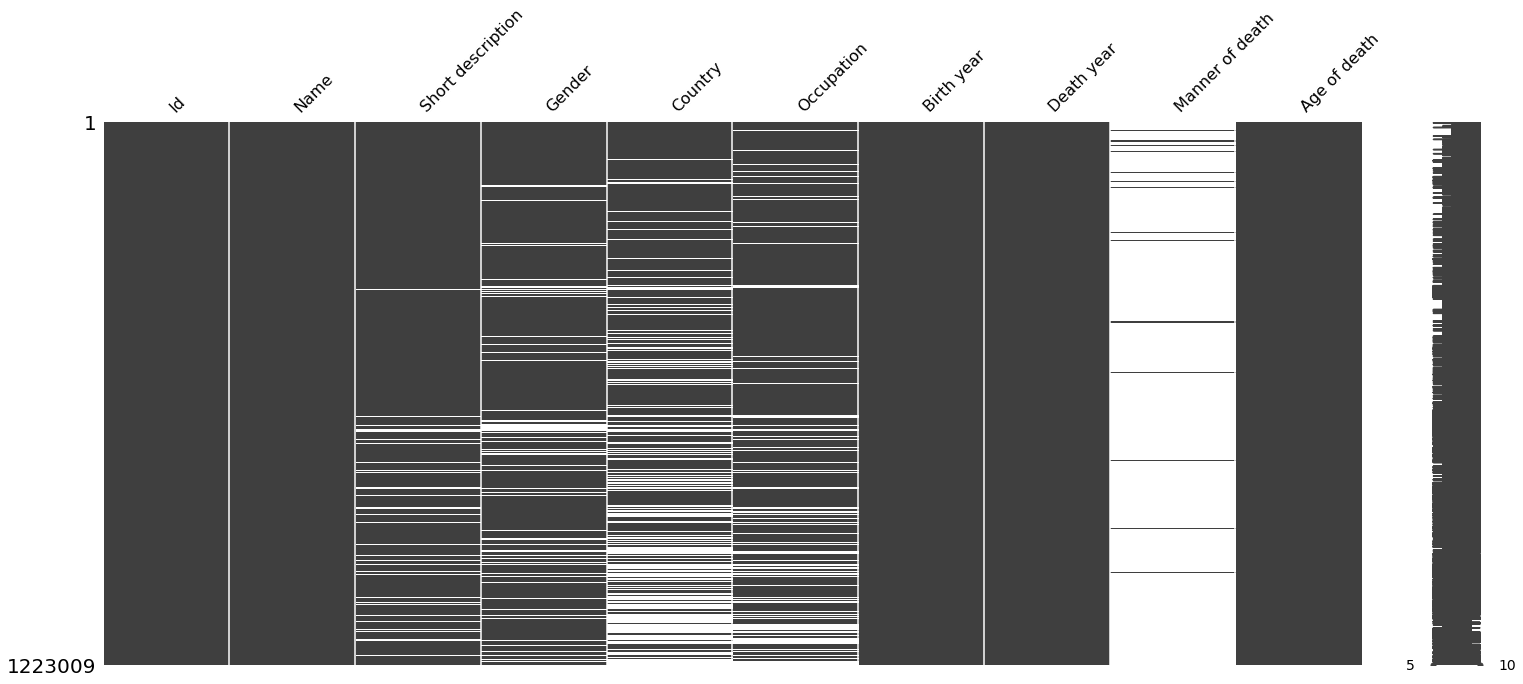

In [7]:
# Identifying the missing values of each column using the misssingno package
import missingno as msno
msno.matrix(df)
plt.show()

#### Data cleaning

In [8]:
df[df['Short description'].isna()].head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
2805,Q44431,蕭伯遊,NaN,NaN,NaN,NaN,484,506.0,NaN,22.0
3073,Q46222,Marcjan Michał Ogiński,NaN,NaN,Grand Duchy of Lithuania; Polish–Lithuanian Co...,NaN,1672,1750.0,NaN,78.0
3697,Q53595,Pranas Brazinskas,NaN,Male,NaN,NaN,1924,2002.0,NaN,78.0
9934,Q73287,蕭円粛,NaN,NaN,NaN,Military personnel,539,584.0,NaN,45.0
12991,Q80221,Kazimierz Frąckiewicz Radzimiński,NaN,Male,Grand Duchy of Lithuania; Polish–Lithuanian Co...,NaN,1638,1694.0,NaN,56.0


In [9]:
df['Short description'] = df['Short description'].fillna(value='')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1223009 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [11]:
df.dropna(axis=0, subset = ['Death year'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223008 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223008 non-null  object 
 1   Name               1223008 non-null  object 
 2   Short description  1223008 non-null  object 
 3   Gender             1089362 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223008 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 102.6+ MB


In [13]:
genders = df['Gender'].value_counts()
genders

Male                                              981364
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

In [72]:
plt.figure(figsize=[20,5])
sns.set_style('darkgrid')
sns.set_context('talk')
genders.iplot(y='Gender', kind='barh', title='Gender Distribution')

<Figure size 1440x360 with 0 Axes>

In [15]:
occupations = df['Occupation'].value_counts()

In [16]:
occupations.head(20)

Artist                281512
Politician            195390
Athlete               110943
Researcher             90709
Military personnel     52911
Religious figure       37086
Businessperson         19529
Architect              17865
Journalist             16002
Teacher                15693
Physician              13253
Engineer               13160
Judge                   8454
Lawyer                  7184
Jurist                  4601
Aristocrat              3670
Entrepreneur            2926
Philosopher             2819
Translator              2742
Publisher               2475
Name: Occupation, dtype: int64

In [17]:
# the death year and age of death are float, so we convert them to integer

df['Death year'] = df['Death year'].astype('int')
df['Age of death'] = df['Age of death'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223008 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Id                 1223008 non-null  object
 1   Name               1223008 non-null  object
 2   Short description  1223008 non-null  object
 3   Gender             1089362 non-null  object
 4   Country            887500 non-null   object
 5   Occupation         1016095 non-null  object
 6   Birth year         1223008 non-null  int64 
 7   Death year         1223008 non-null  int32 
 8   Manner of death    53603 non-null    object
 9   Age of death       1223008 non-null  int32 
dtypes: int32(2), int64(1), object(7)
memory usage: 93.3+ MB


In [19]:
df.head(2)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49


### Years with most deaths 

In [20]:
deaths_by_year = df.groupby(['Death year']).size().reset_index(name='Count')
deaths_by_year = deaths_by_year.sort_values(by='Count', ascending=False).head(100)
deaths_by_year

,Death year,Count
2246,2015,13952
2245,2014,13915
2244,2013,13582
2247,2016,13538
2248,2017,13425
...,...,...
2150,1919,4742
2159,1928,4741
2158,1927,4690
2147,1916,4675


In [67]:
fig = px.bar(deaths_by_year , x='Death year', y='Count', title='Numbers of deaths per year')
fig.show()

In [52]:
top_index = [x for x in occupations.head(10).index]
age_data = df[df['Occupation'].isin(top_index)]
age_data = age_data[age_data['Gender'].isin(['Male', 'Female'])]
age_data.shape

(758499, 10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Politician'),
  Text(1, 0, 'Artist'),
  Text(2, 0, 'Athlete'),
  Text(3, 0, 'Researcher'),
  Text(4, 0, 'Military personnel'),
  Text(5, 0, 'Businessperson'),
  Text(6, 0, 'Architect'),
  Text(7, 0, 'Teacher'),
  Text(8, 0, 'Journalist'),
  Text(9, 0, 'Religious figure')])

<Figure size 720x720 with 0 Axes>

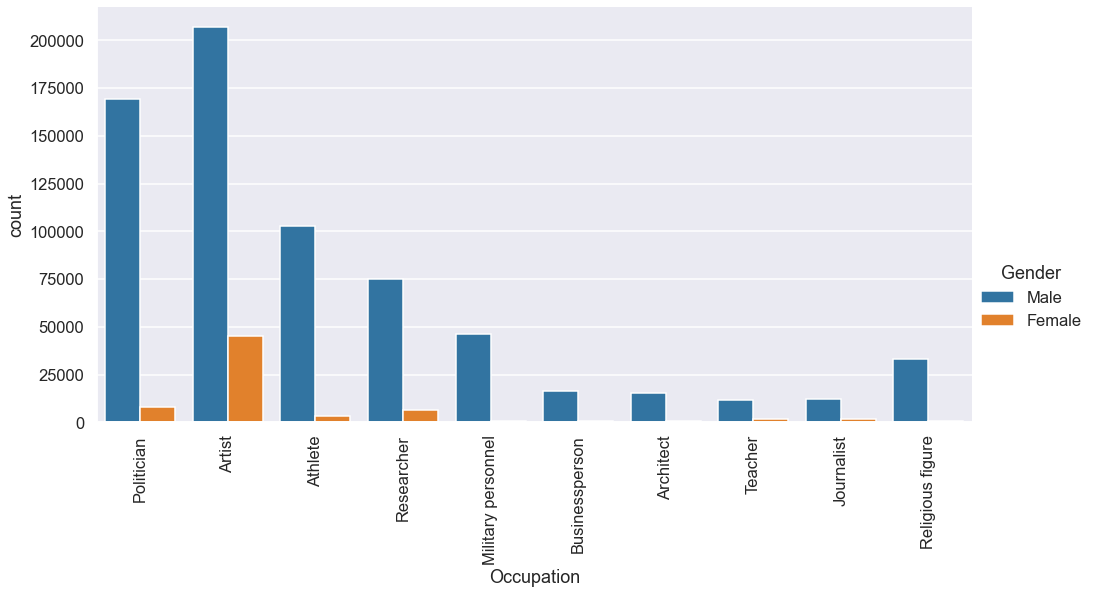

In [23]:
plt.figure(figsize=[10,10])
sns.catplot(data=age_data, x='Occupation', kind='count' ,hue='Gender', height=7,aspect=2)
plt.xticks(rotation=90)

In [24]:
occupations.head(10)

Artist                281512
Politician            195390
Athlete               110943
Researcher             90709
Military personnel     52911
Religious figure       37086
Businessperson         19529
Architect              17865
Journalist             16002
Teacher                15693
Name: Occupation, dtype: int64

In [25]:
df2 = df[['Occupation', 'Age of death']]

In [26]:
df3 = df2.groupby('Occupation').agg({'Age of death': ['mean', 'min','max']}).reset_index()

### The average, minimum and maximum age given of the ten most popular professions

In [27]:
df3[df3['Occupation'].isin(['Artist','Politician','Teacher','Religious figure', 'Athlete', 'Reseacher', 'Militaty Personnel',
                           'Journalist', 'Architect', 'Businessperson'])]

Occupation Age of death        
                               mean min max
364          Architect    72.085306  11  99
538             Artist    69.725145  11  99
666            Athlete    68.772460  11  99
1358    Businessperson    74.153054  11  99
4262        Journalist    69.591239  13  99
6827        Politician    70.541558  11  99
7565  Religious figure    69.801273  11  99
8709           Teacher    73.331995  14  99

#### The oldest person

In [28]:
df[df['Age of death'] == df['Age of death'].max()]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
498725,Q5723916,Henry Jenkins,British supercentenarian,Male,NaN,NaN,1501,1670,NaN,169


#### The top 10 causes of death

In [29]:
df['Manner of death'].value_counts().head(10)

natural causes                         33532
suicide                                 5814
accident                                5044
homicide                                4692
capital punishment                      3415
unnatural death                          308
death in battle                          250
capital punishment; unnatural death       79
capital punishment; suicide               42
capital punishment; homicide              42
Name: Manner of death, dtype: int64

#### The top 3 causes of death of the most popular occupations

In [30]:
df4 = df[['Occupation', 'Manner of death']] 

In [31]:
df5 = df4.groupby('Occupation',as_index='Occupation').value_counts().reset_index()

In [32]:
# Artist
df5[df5['Occupation'].isin(['Artist'])].head(3)

,Occupation,Manner of death,0
141,Artist,natural causes,14457
142,Artist,suicide,2061
143,Artist,accident,1273


In [33]:
# Politician
df5[df5['Occupation'].isin(['Politician'])].head(3)

,Occupation,Manner of death,0
1940,Politician,natural causes,4439
1941,Politician,homicide,1215
1942,Politician,suicide,850


In [34]:
# Teacher
df5[df5['Occupation'].isin(['Teacher'])].head(3)

,Occupation,Manner of death,0
2655,Teacher,natural causes,284
2656,Teacher,suicide,46
2657,Teacher,accident,43


In [35]:
# Journalist
df5[df5['Occupation'].isin(['Journalist'])].head(3)

,Occupation,Manner of death,0
1295,Journalist,natural causes,693
1296,Journalist,homicide,179
1297,Journalist,suicide,92


In [36]:
# Researcher
df5[df5['Occupation'].isin(['Researcher'])].head(3)

,Occupation,Manner of death,0
2235,Researcher,natural causes,2113
2236,Researcher,suicide,291
2237,Researcher,accident,271


In [37]:
# Military personnel
df5[df5['Occupation'].isin(['Military personnel'])].head(3)

,Occupation,Manner of death,0
1517,Military personnel,natural causes,830
1518,Military personnel,accident,480
1519,Military personnel,capital punishment,421


In [46]:
import plotly.express as px

### Countries with most data provided

In [47]:
top_countries = df['Country'].value_counts().head(20)
top_countries

United States of America                                       152761
Germany                                                         95081
France                                                          78666
United Kingdom; United Kingdom of Great Britain and Ireland     29684
Sweden                                                          26915
Spain                                                           26084
United Kingdom                                                  22498
Canada                                                          22386
Poland                                                          19323
United Kingdom of Great Britain and Ireland                     19026
Italy; Kingdom of Italy                                         18781
Kingdom of the Netherlands                                      18710
Japan                                                           18490
Norway                                                          16762
Austria             

In [50]:
fig = px.pie(names = top_countries.index,
             values = top_countries,
             hole = 0.5,
             title = 'Countries with most data given')
fig.show()